# Módulo 6 tarefa 1

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esses arquivos.

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:

# importo o csv
df = pd.read_csv('sinasc_RO_2019.csv')

# crio outro dataframe só com as colunas que vou usar no exercício
colunas_de_interesse = ['APGAR1', 'APGAR5', 'SEXO', 'GESTACAO', 'ESTCIVMAE', 'CONSULTAS']

df = df[colunas_de_interesse].copy()

df.shape

(27028, 6)

In [3]:
df.head()

,APGAR1,APGAR5,SEXO,GESTACAO,ESTCIVMAE,CONSULTAS
0,9.0,10.0,Masculino,37 a 41 semanas,5.0,4
1,8.0,9.0,Feminino,37 a 41 semanas,2.0,4
2,8.0,10.0,Feminino,37 a 41 semanas,9.0,4
3,9.0,10.0,Feminino,37 a 41 semanas,5.0,3
4,8.0,10.0,Feminino,37 a 41 semanas,2.0,4


In [4]:
df.describe(include='object').transpose()

,count,unique,top,freq
SEXO,27024,2,Masculino,13886
GESTACAO,25796,6,37 a 41 semanas,22589


In [5]:
df.describe(include='number').transpose()

,count,mean,std,min,25%,50%,75%,max
APGAR1,26932.0,8.137457,0.984925,0.0,8.0,8.0,9.0,10.0
APGAR5,26925.0,9.179164,0.790574,0.0,9.0,9.0,10.0,10.0
ESTCIVMAE,26711.0,2.545318,1.671248,1.0,1.0,2.0,5.0,9.0
CONSULTAS,27028.0,3.576402,0.788492,1.0,3.0,4.0,4.0,9.0


In [6]:
df.isnull().sum()

APGAR1         96
APGAR5        103
SEXO            4
GESTACAO     1232
ESTCIVMAE     317
CONSULTAS       0
dtype: int64

In [7]:
# substituo nulos das numéricas pela mediana e das categóricas pela moda

# Categoricos
df['SEXO'].fillna( value = df['SEXO'].describe()['top'], inplace=True )
df['GESTACAO'].fillna( value = df['GESTACAO'].describe()['top'], inplace=True )


#Numéricas
df['APGAR1'].fillna( value = df['APGAR1'].describe()['50%'], inplace=True )
df['APGAR5'].fillna( value = df['APGAR5'].describe()['50%'], inplace=True )
df['ESTCIVMAE'].fillna( value = df['ESTCIVMAE'].describe()['50%'], inplace=True )


df.isnull().sum()

APGAR1       0
APGAR5       0
SEXO         0
GESTACAO     0
ESTCIVMAE    0
CONSULTAS    0
dtype: int64

####  2) Monte um gráficos de barras com as variáveis APGAR1, APGAR5, SEXO, GESTACAO, ESTCIVMAE.

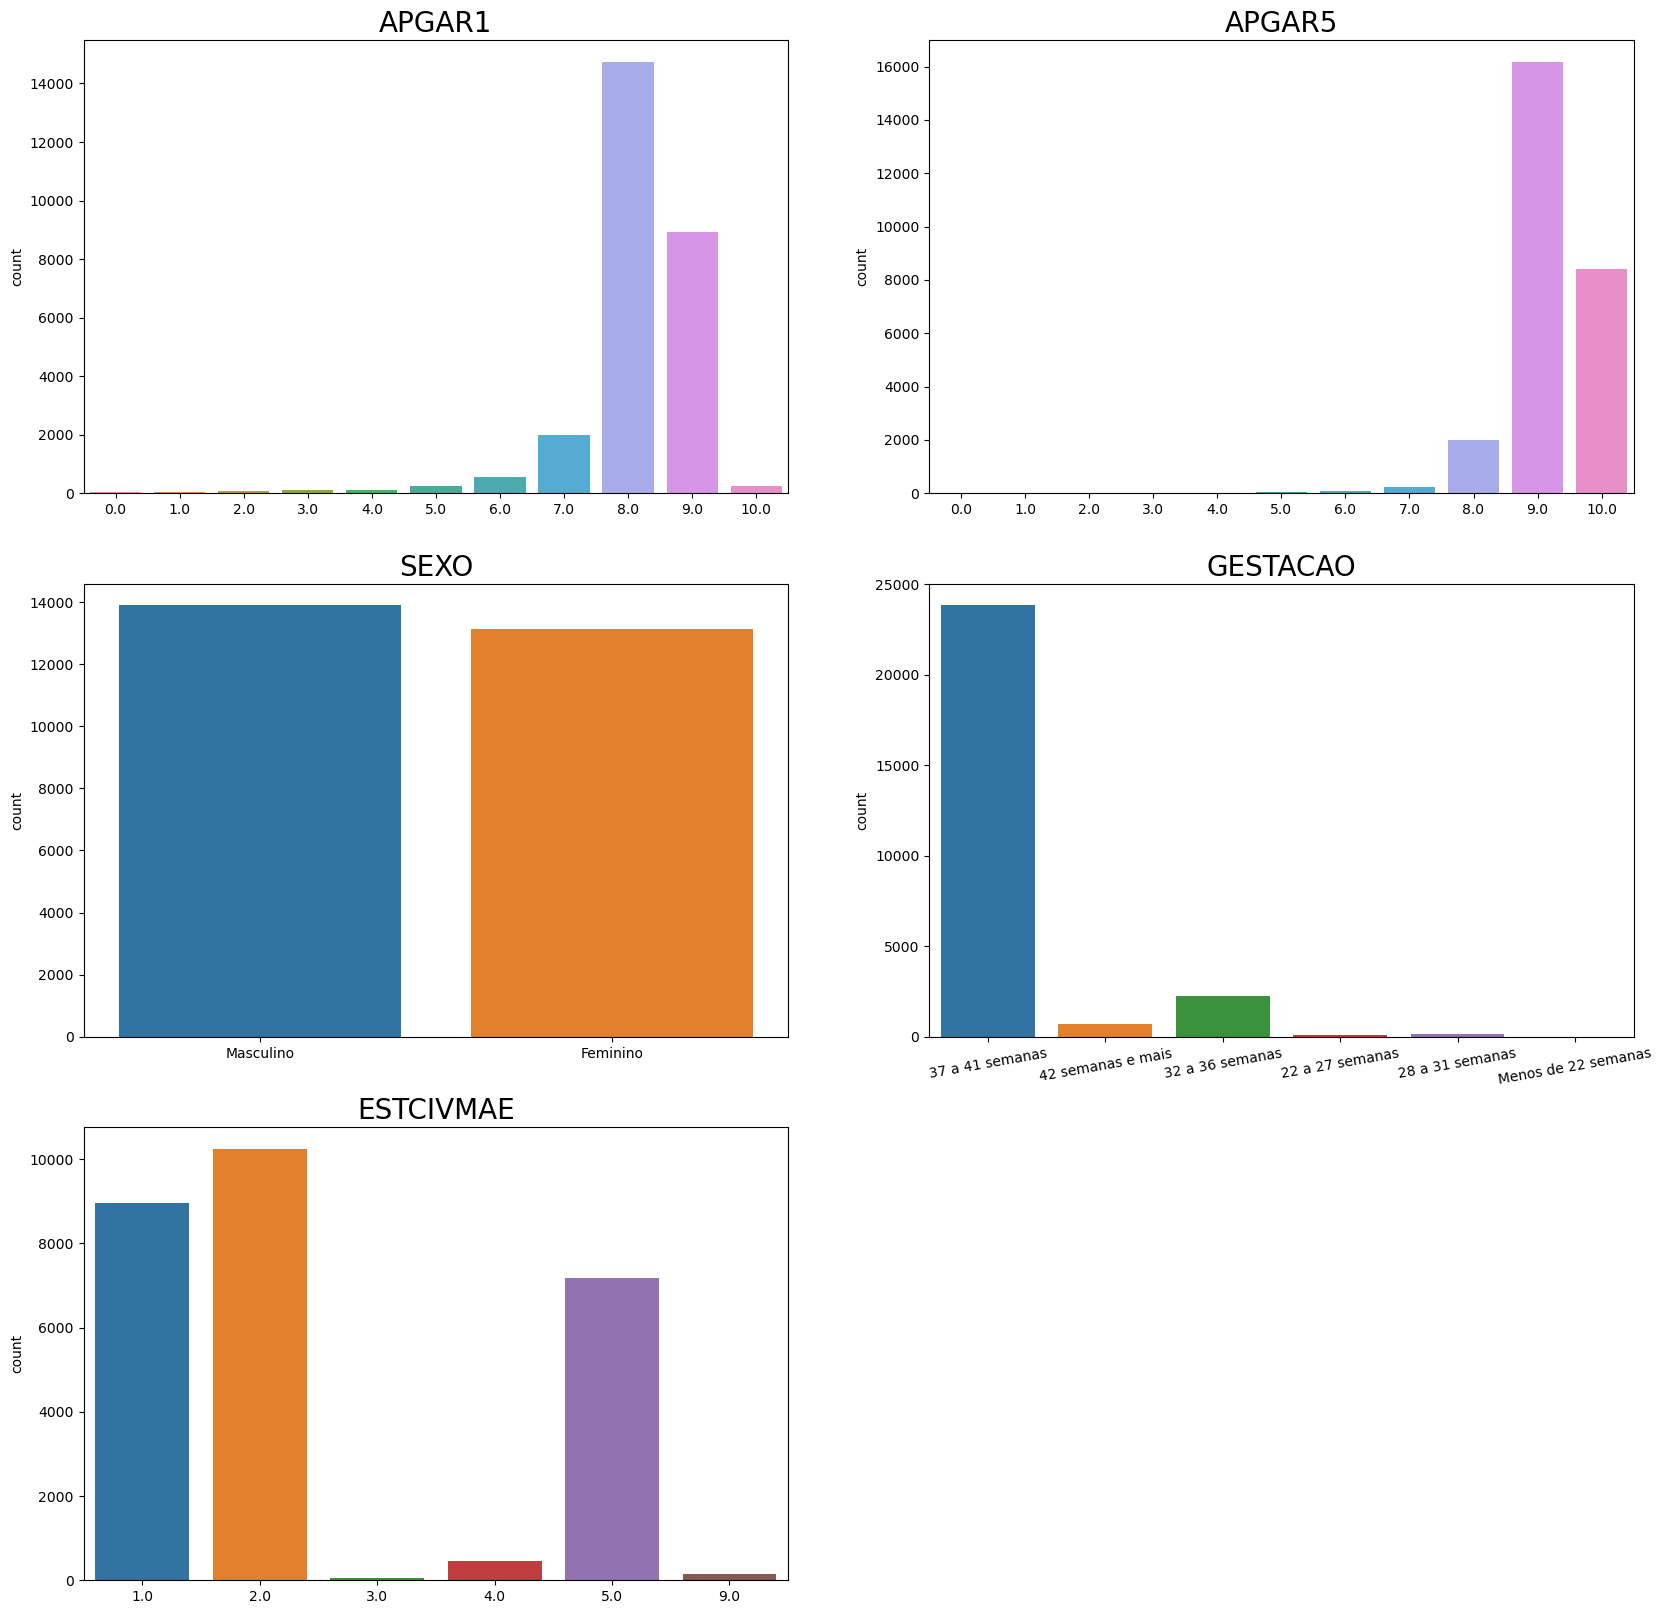

In [91]:
plt.rc('figure', figsize=(20, 20))

plt.close("all")

figura, axes = plt.subplots(3,2)

sns.countplot(data = df, x = 'APGAR1', ax = axes[0,0])
sns.countplot(data = df, x = 'APGAR5', ax = axes[0,1])
sns.countplot(data = df, x = 'SEXO', ax = axes[1,0])
sns.countplot(data = df, x = 'GESTACAO', ax = axes[1,1])
sns.countplot(data = df, x = 'ESTCIVMAE', ax = axes[2,0])

axes[0,0].set_title('APGAR1', fontsize="20")
axes[0,0].set_xlabel("")

axes[0,1].set_title('APGAR5', fontsize="20")
axes[0,1].set_xlabel("")

axes[1,0].set_title('SEXO', fontsize="20")
axes[1,0].set_xlabel("")

axes[1,1].set_title('GESTACAO', fontsize="20")
axes[1,1].set_xlabel("")

axes[2,0].set_title('ESTCIVMAE', fontsize="20")
axes[2,0].set_xlabel("")

axes[1,1].tick_params(axis="x", rotation = 10)

axes[2,1].remove()

plt.show()

#### 3) Monte um gráfico de barras mostrando o APGAR5 médio por CONSULTAS

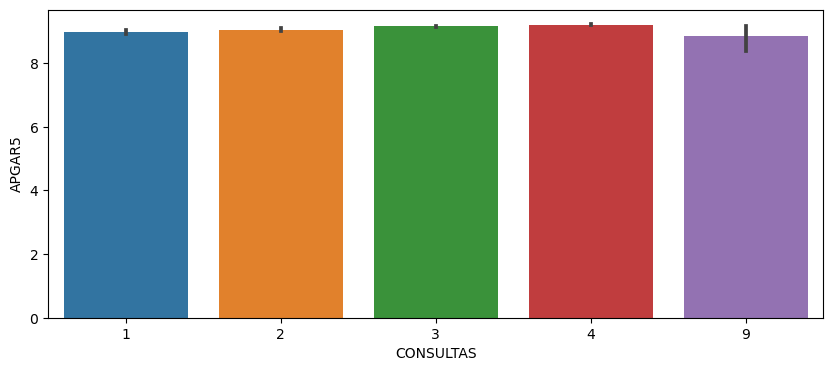

In [92]:
plt.close("all")

plt.rc('figure', figsize=(10, 4))

figura, axes = plt.subplots()

sns.barplot(data = df, x = 'CONSULTAS', y = 'APGAR5', estimator='mean')

plt.show()

####  4) Monte um painel com 4 gráficos mostrando as frequencias de SEXO, GESTACAO, ESTCIVMAE e CONSULTAS

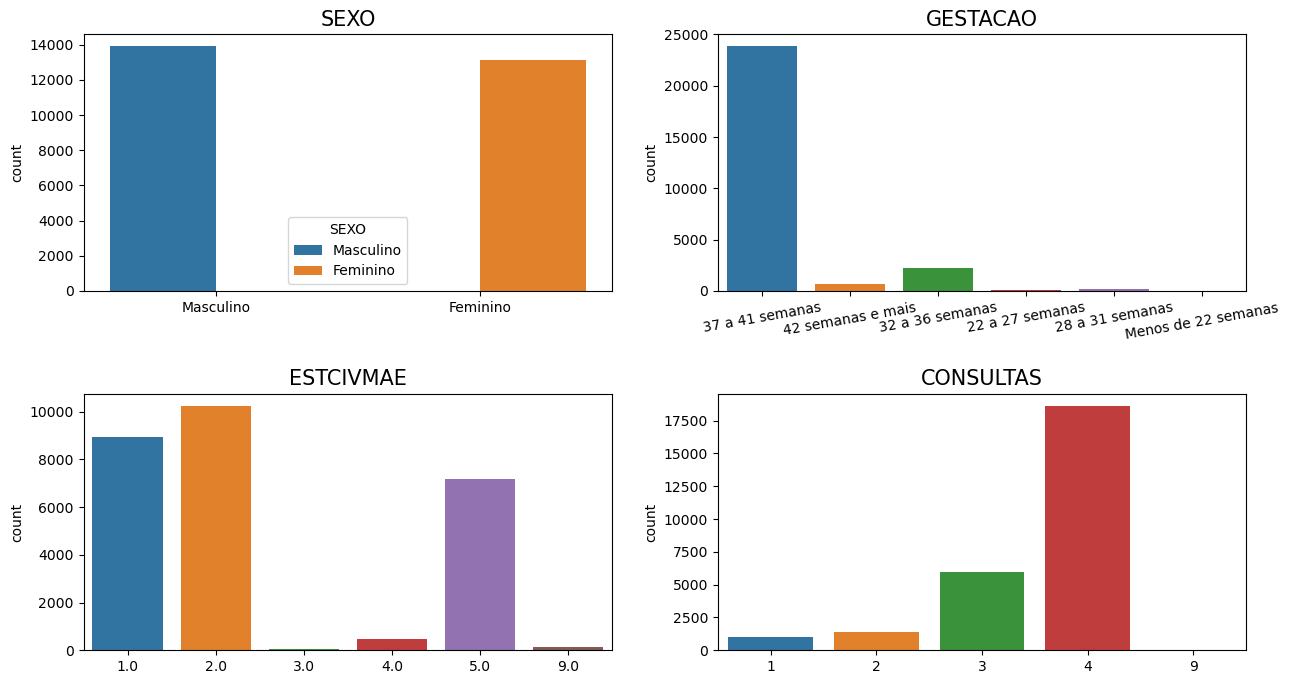

In [94]:
plt.close('all')

plt.rc('figure', figsize=(15, 8))

figura, axes = plt.subplots(2,2)


sns.countplot(data = df, x = 'SEXO', hue='SEXO', ax = axes[0,0])
sns.countplot(data = df, x = 'GESTACAO', ax = axes[0,1])
sns.countplot(data = df, x = 'ESTCIVMAE', ax = axes[1,0])
sns.countplot(data = df, x = 'CONSULTAS', ax = axes[1,1])


axes[0,0].set_title('SEXO', fontsize="15")
axes[0,0].set_xlabel("")

axes[0,1].set_title('GESTACAO', fontsize="15")
axes[0,1].set_xlabel("")

axes[1,0].set_title('ESTCIVMAE', fontsize="15")
axes[1,0].set_xlabel("")

axes[1,1].set_title('CONSULTAS', fontsize="15")
axes[1,1].set_xlabel("")


axes[0,1].tick_params(axis="x", rotation = 10)


plt.subplots_adjust(hspace=0.4)


plt.show()